
# Clase 1 — Programación Orientada a Objetos (POO) — Guía Detallada
**Curso:** Analítica de Datos (PREICA2502B010096)  
**Docente:** Andres Felipe Callejas Jaramillo  
**Fecha de preparación:** 2025-08-14 00:30

> Objetivo: Comprender paso a paso conceptos clave (atributos, tipos, funciones, parámetros, clases, inicializadores, herencia, abstracción, polimorfismo e importaciones) con **explicaciones detalladas** y **ejemplos comentados**.



## Índice
1. Preparación y recomendaciones
2. **Atributos y Tipos de datos** (int, float, str, bool, list, tuple, dict, set; mutabilidad)
3. **Funciones** (def, return, docstrings, tipado, ámbito LEGB)
4. **Parámetros** (posicionales, nombrados, por defecto, `*args`, `**kwargs`, orden recomendado)
5. **Clases** (atributos de instancia y de clase, métodos, `self`)
6. **Inicializadores** (`__init__`) y métodos especiales (`__repr__`, `__str__`, `__eq__`)
7. **Encapsulación y propiedades** (`@property`, validaciones)
8. **Métodos de clase y estáticos** (`@classmethod`, `@staticmethod`)
9. **Herencia** (simple), `super()`, sobrescritura
10. **Abstracción y polimorfismo** (ABC, duck typing)
11. **Importación de librerías** (estándar, terceros y módulos locales)
12. **Mini–proyecto integrador** y **retos de práctica**


## 1) Preparación y recomendaciones de uso
- Ejecuta cada celda en orden (Shift + Enter).
- Lee los comentarios `#` dentro del código: describen **qué** y **por qué**.
- Siente libertad de **modificar** variables y **experimentar**.
- Marca las secciones de **tareas ✍️** para practicar.

## 2) Atributos y Tipos de datos
Los *atributos* son **datos** asociados a un objeto (o a una clase). Antes de ver clases, repasemos **tipos básicos** de Python.

In [2]:
# Tipos básicos y mutabilidad: ejecuta y observa salidas

# Números
entero = 42                # int
flotante = 3.1415          # float
booleano = True            # bool

In [8]:
booleano = False
type(booleano) # type para conocer el tipo de dato de la variable

bool

In [14]:
print(entero ** 5) # imprime en consola

130691232


In [10]:
entero

42

In [15]:
# Texto (cadena)
texto = "Analítica de Datos"  # str (inmutable)

# Secuencias y colecciones
lista = [1, 2, 3]          # list (mutable)
tupla = (1, 2, 3)          # tuple (inmutable)
conjunto = {1, 2, 2, 3}    # set (sin duplicados, mutable)
dicc = {"curso": "Analítica", "clase": 1}  # dict (mutable)

print(type(entero), type(flotante), type(booleano))
print(type(texto), type(lista), type(tupla), type(conjunto), type(dicc))

# Mutabilidad: cambiar lista SÍ cambia el objeto; cambiar tupla NO es posible
lista.append(4)
print("Lista mutada:", lista)
try:
    tupla[0] = 99
except TypeError as e:
    print("Tupla es inmutable:", e)


<class 'int'> <class 'float'> <class 'bool'>
<class 'str'> <class 'list'> <class 'tuple'> <class 'set'> <class 'dict'>
Lista mutada: [1, 2, 3, 4]
Tupla es inmutable: 'tuple' object does not support item assignment


## 3) Funciones
Una **función** encapsula un comportamiento reutilizable. Buenas prácticas:
- Usa **docstrings** para documentar.
- Usa **anotaciones de tipo** para claridad (no obligatorias, sí recomendadas).
- Devuelve valores con `return` (o `None` implícito).

In [ ]:
# definicion de funcion con docstring y tipos
def area_rectangulo(base :float ,alto :float) -> float:
    """Calcular el area del triangulo
    :param base: base del triangulo
    :param alto: altura del triagulo
    :return: area del triangulo
    """
    return base * alto

print("Area de 3x5",area_rectangulo("M",5))
print("docs : ",area_rectangulo.__doc__)

Area de 3x5 MMMMM
docs : Calcular el area del triangulo
    :param base: base del triangulo
    :param alto: altura del triagulo
    :return: area del triangulo
    


In [ ]:
# Ámbito de variables (LEGB): Local, Enclosing, Global, Built-in

x = "global"

def externo():
    x = "enclosing"
    def interno():
        x = "local"
        print("Dentro de interno ->", x)
    interno()
    print("Dentro de externo ->", x)

externo()
print("En módulo ->", x)

Dentro de interno -> local
Dentro de externo -> enclosing
En módulo -> global


## 4) Parámetros (posicionales, nombrados, por defecto, `*args`, `**kwargs`)
Orden recomendado de parámetros en Python:
1. Posicionales puros
2. Posicionales/nombrados
3. `*args` (tupla de posicionales variables)
4. Nombrados puros (después de `*`)
5. `**kwargs` (diccionario de nombrados variables)

In [23]:
# Demostración de tipos de parámetros y orden de llamada

def reporte(curso: str, clase: int = 1, *topics, obligatorio=False, **extras):
    """Ejemplo de combinación de parámetros.
    - curso: posicional/nombrado
    - clase: nombrado con valor por defecto
    - *topics: posicionales variables
    - obligatorio: nombrado puro (aparece tras *)
    - **extras: nombrados variables
    """
    print(f"Curso={curso}, Clase={clase}, Temas={topics}, Obligatorio={obligatorio}, Extras={extras}")

# Llamadas
reporte("Analítica", 1, "POO", "Herencia", obligatorio=True, docente="Andres")
reporte(curso="Analítica", clase=2, obligatorio=False, campus="Virtual")

Curso=Analítica, Clase=1, Temas=('POO', 'Herencia'), Obligatorio=True, Extras={'docente': 'Andres'}
Curso=Analítica, Clase=2, Temas=(), Obligatorio=False, Extras={'campus': 'Virtual'}


In [24]:
# PELIGRO: valores por defecto mutables (antipatrones)
def append_mal(x, contenedor=[]):
    contenedor.append(x)
    return contenedor

print(append_mal(1))
print(append_mal(2))  # Sorprende: ¡acumula estado entre llamadas!

# Solución: usar None y crear un nuevo objeto por llamada
def append_bien(x, contenedor=None):
    if contenedor is None:
        contenedor = []
    contenedor.append(x)
    return contenedor

print(append_bien(1))
print(append_bien(2))

[1]
[1, 2]
[1]
[2]


## 5) Clases
Una **clase** agrupa datos (atributos) y comportamientos (métodos). `self` referencia la **instancia actual**.

In [33]:
# Clase con atributos de instancia y de clase

class Estudiante:
    # Atributo de clase (compartido por todas las instancias)
    universidad = "I.U. Digital"

    def __init__(self, nombre: str, codigo: str, semestre: int = 1):
        # Atributos de instancia (propios de cada objeto)
        self.nombre = nombre
        self.codigo = codigo
        self.semestre = semestre

    def avanzar(self):
        self.semestre += 1
        return self.semestre
    
    def cambiar(self):
        self.codigo = "A002{} {}{}".format(2,1,4)#"A002" + "2" #"A002{} {}{}".format(2,1,4)
        print(self.codigo)

e1 = Estudiante("Ana", "A001", 2)
e2 = Estudiante("Luis", "A002")

print(e1.universidad, e2.universidad)  # atributo de clase
print(e1.nombre, "-> semestre", e1.semestre)
e1.avanzar()
print(e1.nombre, "-> semestre", e1.semestre)
e2.avanzar()
print(e2.nombre, "-> semestre", e2.semestre)
e2.cambiar()


I.U. Digital I.U. Digital
Ana -> semestre 2
Ana -> semestre 3
Luis -> semestre 2
A0022 14


### Repaso Semana 1
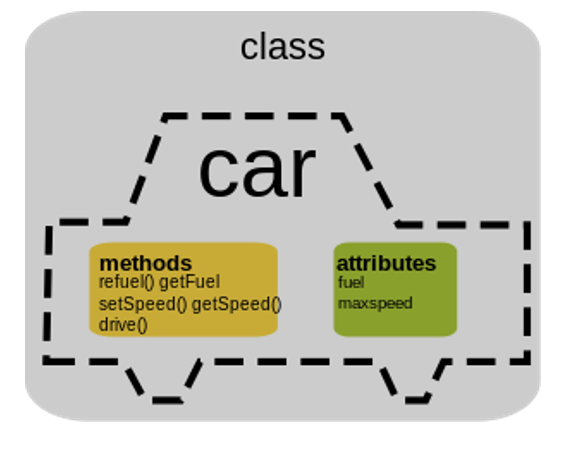

## Atributos sin clase

In [21]:
type_car= ["camioneta", "automovil", "Taxi"] 
color = "negro"
num_puertas=4
tipo_combustible=["disel","gasolina"]
name ="mazda cx30"

print(type_car)

['camioneta', 'automovil', 'Taxi']


### clase carro

In [ ]:

class car():
    def __init__(self, name="",tipo_car=[],color="",num_puertas=0,tipo_combustible=[]):
        self.name = name
        self.tipo_car=tipo_car
        self.color=color
        self.num_puertas=num_puertas
        self.tipo_combustible=tipo_combustible

    def frenar(self,tipo=0):
        if tipo ==1 :
            self.tipo_disco_freno="abs"
        else:
            self.tipo_disco_freno="disco"
        return self.tipo_disco_freno


    def __str__(self):
        print(self.name ,self.tipo_car,self.color,self.num_puertas,self.tipo_combustible)






In [36]:
carro = car(name ,type_car,color,num_puertas,tipo_combustible)
print(carro.__str__())
print(carro.frenar(1))

mazda cx30 ['camioneta', 'automovil', 'Taxi'] negro 4 ['disel', 'gasolina']
None
abs
